## Import Neccessary

In [1]:
import numpy as np
import pandas as pd
# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import  cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [2]:
hr=pd.read_excel(r"K:\Desktop\NIIT\Practice\Course9\DS2_C5_S5_HR_Data_Practice.xlsx")
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,5089
14995,0.37,0.48,2,160,3,0,1,0,support,low,4001
14996,0.37,0.53,2,143,3,0,1,0,support,low,12842
14997,0.11,0.96,6,280,4,0,1,0,support,low,8849


<AxesSubplot: xlabel='left'>

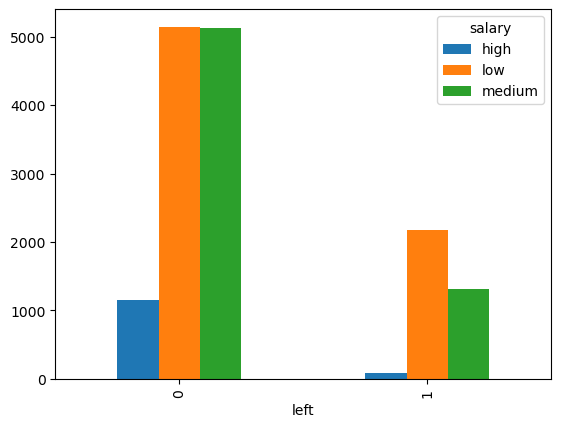

In [3]:
pd.crosstab(hr["left"],hr["salary"]).plot(kind="bar")

<AxesSubplot: xlabel='left'>

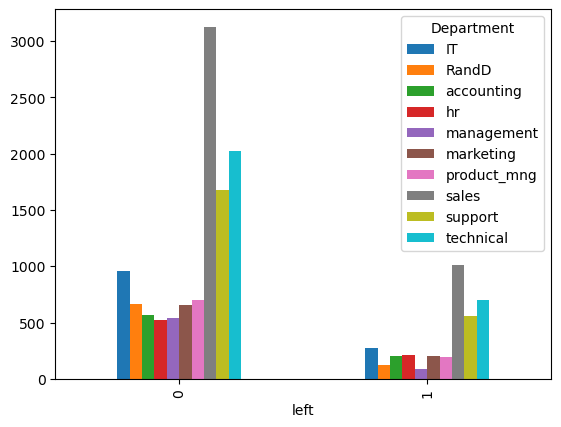

In [4]:
pd.crosstab(hr["left"],hr["Department"]).plot(kind="bar")

## Missing value imputations 

In [5]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
salary_num               0
dtype: int64

In [6]:
import seaborn as sns
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.046656
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.022006
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.007598
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.006997
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.047869
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.006091
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.140561
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.091209
salary_num,0.046656,-0.022006,-0.007598,-0.006997,0.047869,0.006091,-0.140561,0.091209,1.000000


## Splitting and labelencoding and scaling

In [7]:
import sklearn.preprocessing as sk
Labeler=sk.LabelEncoder()
hr["salary"]=Labeler.fit_transform(hr["salary"])
hr["Department"]=Labeler.fit_transform(hr["Department"])

In [8]:
scaler=sk.MinMaxScaler()
x=hr.loc[:,["satisfaction_level","salary"]]
x=scaler.fit_transform(x)
y=hr["salary_num"]

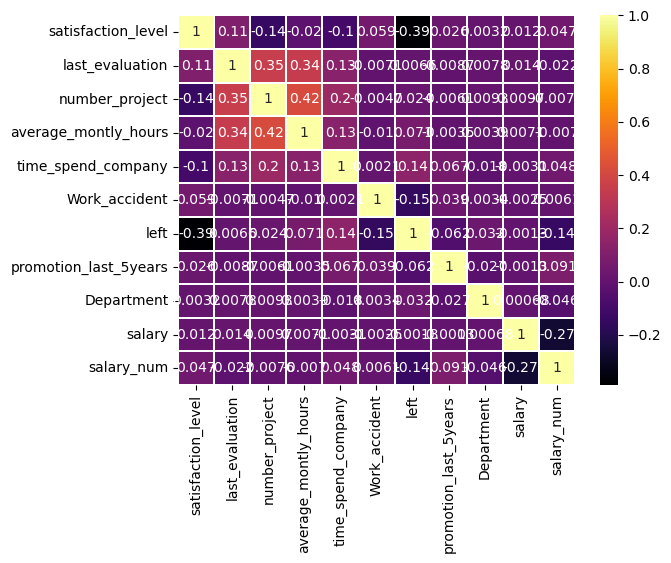

In [9]:
hr1=hr.copy()
sns.heatmap(hr1.corr(),annot=True,cmap="inferno",linewidth=0.1)
plt.rcParams["figure.figsize"] = (10,10)

## Splitting training and model evalution

In [10]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold

## Kfold split

In [12]:
kf = KFold(n_splits=5, shuffle=False, random_state=None)
abme=[]
for train, test in kf.split(hr):
     print("Train data",train,"Test data",test)
     train_data=hr.iloc[train,:]
     test_data=hr.iloc[test,:]
     xtrain=train_data.drop("salary_num",axis=1)
     ytrain=train_data["salary_num"]
     xtest=test_data.drop("salary_num",axis=1)
     ytest=test_data["salary_num"]
     dtr=DecisionTreeRegressor(max_depth=5, min_samples_split=5, max_leaf_nodes=10)
     dtr.fit(xtrain,ytrain)
     ypred=dtr.predict(xtest)
     abme.append(mean_absolute_error(ypred,ytest))
print(abme.index(np.min(abme)))
i=0
for train, test in kf.split(hr):
    if(i==0):
       train_data=hr.iloc[train,:]
       test_data=hr.iloc[test,:]
       xtrain=train_data.drop("salary_num",axis=1)
       ytrain=train_data["salary_num"]
       xtest=test_data.drop("salary_num",axis=1)
       ytest=test_data["salary_num"]



Train data [ 3000  3001  3002 ... 14996 14997 14998] Test data [   0    1    2 ... 2997 2998 2999]
Train data [    0     1     2 ... 14996 14997 14998] Test data [3000 3001 3002 ... 5997 5998 5999]
Train data [    0     1     2 ... 14996 14997 14998] Test data [6000 6001 6002 ... 8997 8998 8999]
Train data [    0     1     2 ... 14996 14997 14998] Test data [ 9000  9001  9002 ... 11997 11998 11999]
Train data [    0     1     2 ... 11997 11998 11999] Test data [12000 12001 12002 ... 14996 14997 14998]
0


In [13]:
#xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
dtr=DecisionTreeRegressor(max_depth=5, min_samples_split=5, max_leaf_nodes=10)
dtr.fit(xtrain,ytrain)
print("The Coefficient of determination of model : ",round(dtr.score(xtrain,ytrain)*100,2),"%")
ypred=dtr.predict(xtest)
print("The root mean squared error  score : ",mean_squared_error(ypred,ytest,squared=False))
print("The absolute mean error  score : ",mean_absolute_error(ypred,ytest))

The Coefficient of determination of model :  82.52 %
The root mean squared error  score :  14682.30449979119
The absolute mean error  score :  8819.456393227993


## Conclusion
The DecisionTreeRegressor model has been evaluated using two metrics: R^2 and RMSE.
R^2 score of 82.28% shows the model explains 82.28% of variability in the target variable.
RMSE measures the difference between true and predicted values. A lower RMSE value is better. The model has a low prediction error with RMSE scores of 14464.611 and 8832.
In conclusion, the model has a good fit to the data but there may be room for improvement. The R^2 score is high and the RMSE score is low, but the second RMSE score is lower than the first one, indicating a better fit